In [86]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(25)

In [87]:
#Função que transforma Linear para dB
def lin2db(x):
    return 10 * np.log10(x)

#Função que transforma dB para Linear
def db2lin(x):
    return 10 ** (x / 10)

In [88]:
# Função que gera as coordenadas dos APs
def distribuir_APs(num_aps):
    '''Distributes Access Points (APs) evenly within a square area.
    
    Parameters:
    num_aps (int): The number of APs to distribute. Must be a perfect square.
    
    Returns:
    np.array: An array of coordinates for the APs, or None if num_aps is not a perfect square.'''
    
    if num_aps not in [1, 4, 9, 16, 25, 36, 49, 64, 100]:
        return None

    tamanho_quadrado = 1000
    lado_quadrado = int(np.sqrt(num_aps))

    tamanho_celula = tamanho_quadrado // lado_quadrado

    # Criar coordenadas usando meshgrid
    x, y = np.meshgrid(np.arange(0.5 * tamanho_celula, tamanho_quadrado, tamanho_celula),
                      np.arange(0.5 * tamanho_celula, tamanho_quadrado, tamanho_celula))

    coordenadas_APs = np.column_stack((x.ravel(), y.ravel()))

    return coordenadas_APs

In [89]:
# Função que gera a distância entre a UE e a AP
def dAPUE(x_coord, y_coord, ap_coord):
  '''Calculate the Euclidean distance between a user equipment (UE) and an access point (AP).
    
    Parameters:
    ue_coords (tuple): A tuple (x_coord, y_coord) representing the coordinates of the UE.
    ap_coords (np.array): An array containing the coordinates of the APs.
    
    Returns:
    float: The Euclidean distance between the UE and the AP.
  '''
  dAPUE = np.linalg.norm(np.array([x_coord, y_coord]) - ap_coord)
  return dAPUE

In [90]:
def canal_UE(ue, channel):
    UE = np.zeros(ue)

    if ue == channel:
        # Quando o número de canal é igual ao número de UE
        for i in range(channel):
            UE[i] = i
    elif ue < channel:
        # Quando eu tenho mais canal do que UE
        for i in range(ue):
            UE[i] = i
    else:
        # Quando eu tenho mais UE do que canal
        for i in range(ue):
            if i < channel:
                UE[i] = i
            else:
                UE[i] = np.random.randint(0, channel)
                

    return UE

In [91]:
#Função que define o shadowing para cada usuário
def find_shadowing(sigma):
    '''Generate a shadowing value for a user.

    Parameters:
    sigma (float): The standard deviation of the shadowing values.

    Returns:
    float: The shadowing value for the user.
    '''

    shadowing = np.random.lognormal(0, sigma, 1)

    return shadowing 

In [92]:
def find_fastfading(standard, ue, channel, aps):
    '''Função que calcula o fast fading para um dado usuário.
    
    Parâmetros:
    standard (int): O desvio padrão da distribuição normal.
    
    Retorna:
    list: O valor do fast fading para cada usuário.'''

    x1 = np.random.normal(0, standard, 1)
    x2 = np.random.normal(0, standard, 1)
    r = np.sqrt(x1**2 + x2**2)
    p_r = (r/(standard**2)) * np.exp(-r**2/(2*standard**2))

    return p_r

In [93]:
# Função que calcula o path gain apenas com a distância
def find_path_gain_dist(dist):

    c = 1e-4
    n = 4

    if dist >=1:
        path_gain_result = c / (dist ** n)
    else:
        path_gain_result = 0
        
    return path_gain_result 

In [94]:
# Função que calcula o path gain com a distância e o shadowing
def find_path_gain_shadow(dist, shadowing):
    c = 1e-4
    n = 4

    if dist >=1:
        path_gain_result = shadowing*(c / (dist ** n))
    else:
        path_gain_result = 0
    return path_gain_result

In [95]:
# Função que calcula o path gain com a distância, shadowing e fast fading
def find_path_gain_fastfading(dist, shadowing, fastfading):
    c = 1e-4
    n = 4

    if dist >=1:
        path_gain_result = shadowing * (c / (dist ** n)) * fastfading**2
    else:
        path_gain_result = 0
    
    return path_gain_result

In [96]:
# Função que calcula a potência recebida
def find_pot_rec(pot_trans, pathgain):

    pot_rec = pathgain * pot_trans

    return pot_rec

In [97]:
''' 
    for j in range(ues):
        for i in range(aps):
            for c in range(channels):
                x_coord[j] = np.random.randint(0, 1000)
                y_coord[j] = np.random.randint(0, 1000)
                distance[i] = dAPUE(x_coord[j], y_coord[j], ap_coord[i])
                shadowing[j] = find_shadowing(sigma_shadowing)
                fastfading[j] = find_fastfading(sigma_fastfading)

                # Definindo qual tipo de path gain eu irei trabalhar, sendo 0 referente somente a distância, 1 adicionando o shadowing e 2 adicionando o shasowing e o fastfading.
                if pathgain_index == 0:
                    pathgain[j] = find_path_gain_dist(distance[i])

                elif pathgain_index == 1:
                    pathgain[j] = find_path_gain_shadow(distance[i], shadowing[j])

                elif pathgain_index == 2:
                    pathgain[j] = find_path_gain_fastfading(distance[i], shadowing[j], fastfading[j])

                pot_rec[j, i, c] = find_pot_rec(p_t, pathgain[j])
                for ch1 in range(ues):
                    if ue_channel[j] == ue_channel[ch1] and j != ch1:
                        interference = np.delete(pot_rec, ch1)
                        channel_interference = np.sum(interference)
                        sinr[j] = pot_rec[j] / (pot_noise + channel_interference)
'''

' \n    for j in range(ues):\n        for i in range(aps):\n            for c in range(channels):\n                x_coord[j] = np.random.randint(0, 1000)\n                y_coord[j] = np.random.randint(0, 1000)\n                distance[i] = dAPUE(x_coord[j], y_coord[j], ap_coord[i])\n                shadowing[j] = find_shadowing(sigma_shadowing)\n                fastfading[j] = find_fastfading(sigma_fastfading)\n\n                # Definindo qual tipo de path gain eu irei trabalhar, sendo 0 referente somente a distância, 1 adicionando o shadowing e 2 adicionando o shasowing e o fastfading.\n                if pathgain_index == 0:\n                    pathgain[j] = find_path_gain_dist(distance[i])\n\n                elif pathgain_index == 1:\n                    pathgain[j] = find_path_gain_shadow(distance[i], shadowing[j])\n\n                elif pathgain_index == 2:\n                    pathgain[j] = find_path_gain_fastfading(distance[i], shadowing[j], fastfading[j])\n\n            

In [98]:
def calculate_sinr(banda, K_0, aps, ues, channels, sigma_shadowing, sigma_fastfading, p_t, pathgain_index):
    '''Vamos definir os coeficientes:
    i-th = indice da AP
    j-th = indice da UE
    c-th = indice do canal
    '''

    x_coord = np.zeros(ues)
    y_coord = np.zeros(ues)
    sinr = np.zeros(ues)
    shadowing = np.zeros(ues)
    fastfading = np.zeros(ues)
    distance = np.zeros(aps)
    pathgain = np.zeros(ues)
    pot_rec = np.zeros((ues, aps, channels))
    ue_channel = np.zeros(ues)
    pot_noise = K_0*(banda/channels)

    ap_coord = distribuir_APs(aps)

    ue_channel = canal_UE(ues, channels)

    for c in range(channels):
        ues_on_channel = np.where(ue_channel == c)[0] # Retorna os índices dos usuários que estão no canal c

        for j in ues_on_channel:
            # Definindo a posição de cada UE
            x_coord[j] = np.random.randint(0, 1000)
            y_coord[j] = np.random.randint(0, 1000)

            for i in range(aps):
                distance[i] = dAPUE(x_coord[j], y_coord[j], ap_coord[i])
                shadowing[j] = find_shadowing(sigma_shadowing)
                fastfading[j] = find_fastfading(sigma_fastfading, ues, aps, channels)
                # Definindo qual tipo de path gain eu irei trabalhar, sendo 0 referente somente a distância, 1 adicionando o shadowing e 2 adicionando o shasowing e o fastfading.
                if pathgain_index == 0:
                    pathgain[j] = find_path_gain_dist(distance[i])

                elif pathgain_index == 1:
                    pathgain[j] = find_path_gain_shadow(distance[i], shadowing[j])

                elif pathgain_index == 2:
                    pathgain[j] = find_path_gain_fastfading(distance[i], shadowing[j], fastfading[j])

                pot_rec[j, i, c] = find_pot_rec(p_t, pathgain[j])
        
        for j in ues_on_channel:
            interference = 0
            for other_ue in ues_on_channel:
                if other_ue != j:
                    interference += np.sum(pot_rec[other_ue, :, c])

            sinr[j] = np.sum(pot_rec[j, :, c]) / (pot_noise + interference)

    return sinr






In [99]:
def find_capacity(sinr, banda, K_0):
    '''Função que calcula a capacidade de um dado canal.
    
    Parâmetros:
    sinr (list): A relação sinal ruído mais interferência.
    banda (int): A largura de banda do canal.
    K_0 (int): Constante de Boltzmann.
    
    Retorna:
    list: A capacidade do canal.'''
    
    capacity = banda * np.log2(1 + sinr)
    
    return capacity

In [100]:
B_t, p_t, d_0, K_0 = 100e6, 1e-3, 1, 1e-17 # Em MHz, mW, metros, mW/Hz respectivamente
aps, ues, channels = 64, 13, 2
sigma_shadowing = 2
sigma_fastfading = 1/np.sqrt(2)
dist, shad, fastf = 0, 1, 2 # Distância, Shadowing, Fast Fading


In [101]:
capacity_acum_dist = np.array([])
capacity_acum_shad = np.array([])
capacity_acum_fast = np.array([])

for i in range (500):
    sinr_dist = calculate_sinr(B_t, K_0, aps, ues, channels, sigma_shadowing, sigma_fastfading, p_t, dist)
    capacity_dist = find_capacity(sinr_dist, B_t, K_0)
    capacity_acum_dist = np.concatenate((capacity_acum_dist, capacity_dist))

    sinr_shad = calculate_sinr(B_t, K_0, aps, ues, channels, sigma_shadowing, sigma_fastfading, p_t, shad)
    capacity_shad = find_capacity(sinr_shad, B_t, K_0)
    capacity_acum_shad = np.concatenate((capacity_acum_shad, capacity_shad))


    sinr_fast = calculate_sinr(B_t, K_0, aps, ues, channels, sigma_shadowing, sigma_fastfading, p_t, fastf)
    capacity_fast = find_capacity(sinr_fast, B_t, K_0)
    capacity_acum_fast = np.concatenate((capacity_acum_fast, capacity_fast))





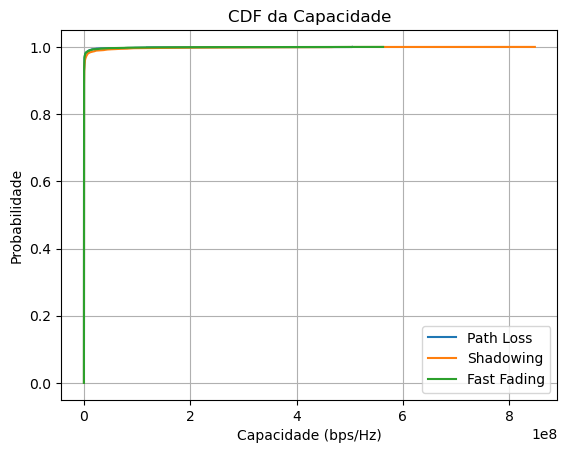

In [103]:
cdf_dist = np.sort(capacity_acum_dist)  
cdf_shad = np.sort(capacity_acum_shad)
cdf_fast = np.sort(capacity_acum_fast)

# Plotando a CDF
plt.figure()
plt.plot(cdf_dist, np.linspace(0, 1, len(cdf_dist)), label='Path Loss')
plt.plot(cdf_shad, np.linspace(0, 1, len(cdf_shad)), label='Shadowing')
plt.plot(cdf_fast, np.linspace(0, 1, len(cdf_fast)), label='Fast Fading')
plt.legend()
plt.xlabel('Capacidade (bps/Hz)')
plt.ylabel('Probabilidade')
plt.title('CDF da Capacidade')
plt.grid()

plt.show()
